In [1]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.sparse as sps
import sys
from matplotlib import pyplot as plt
sys.path.append("../../")

In [2]:
from spook import SpookPosL1, SpookPosL2, SpookL1, SpookLinSolve

In [3]:
from spook import SpookL2

Text(0, 0.5, '$\\omega$')

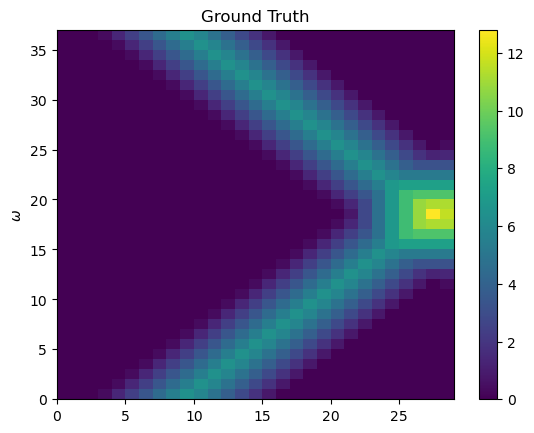

In [8]:
Na = 37
Nb = 29
Ns = 10000
Ng = 31

A = np.random.rand(Ns, Na) * 5
Xtrue = np.zeros((Na, Nb))
bb, aa = np.meshgrid(np.arange(Nb), np.arange(Na))
for p1, p2 in zip([1,-1],[1,-1]):
    tmp = 0.1*(Na+Nb) - abs((aa - Na//2) + p1* (bb - Nb//2) - p2* 0.2*(Na+Nb))
    tmp[tmp<0] = 0
    Xtrue += tmp

plt.pcolormesh(Xtrue)
plt.colorbar()
plt.title("Ground Truth")
plt.ylabel("$\omega$")

In [9]:
G = np.identity(Ng) - 0.2*np.diag(np.ones(Ng-1),k=-1) - 0.2*np.diag(np.ones(Ng-1),k=1)
G = G[:,:Nb]

B0 = A @ Xtrue
B1 = B0 @ (G.T)
B0 += 1e-3*np.linalg.norm(B0) * np.random.randn(*(B0.shape))
B1 += 1e-3*np.linalg.norm(B1) * np.random.randn(*(B1.shape))

In [10]:
SpookPosL1.verbose=True
SpookPosL2.verbose=True
SpookL1.verbose=True

## With `G=None`

In [11]:
# Normalization check
pre_creation_abssums = {"B0":abs(B0).sum(), "A":abs(A).sum()}
print(f"Before creating a spook solver")
for ky, val in pre_creation_abssums.items():
    print(f"\tsum(|{ky}|)={val:.2g}", end='   ')

Before creating a spook solver
	sum(|B0|)=4.9e+07   	sum(|A|)=9.2e+05   

Setting up the OSQP problem
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


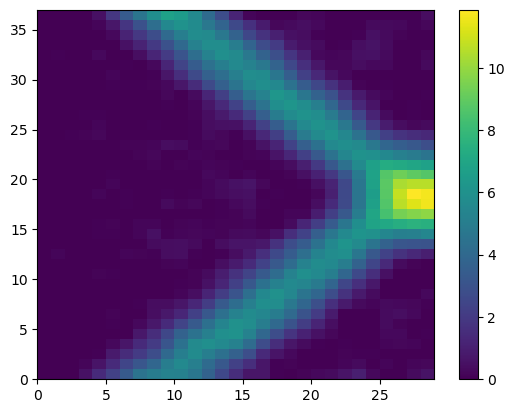

In [12]:
spk0 = SpookPosL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.1,0.1), )

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

In [13]:
print("After creating the spook solver")
assert pre_creation_abssums["B0"] == abs(B0).sum()
assert pre_creation_abssums["A"] == abs(A).sum()
print("Raw A & B0 remain the same as before.")

After creating the spook solver
Raw A & B0 remain the same as before.


Sparsity hyperparam updated.
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


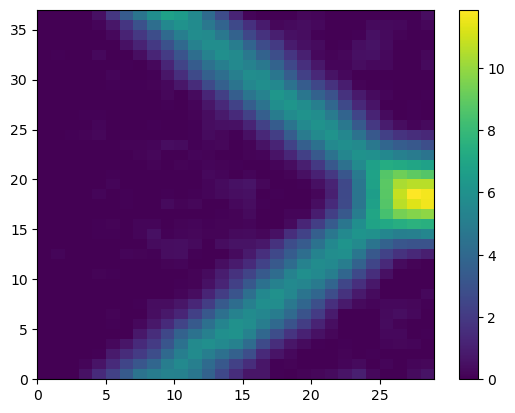

In [14]:
X0 = spk0.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

In [15]:
prctr = spk0.save_prectr()
AtAorig = prctr["AtA"].copy()
spk0ctr = SpookPosL1(prctr["Bcontracted"], prctr['AtA'], "contracted", lsparse=5, lsmooth=(0.1,0.))
print("Contraction results unchanged?",np.allclose(AtAorig,prctr['AtA']))

Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Contraction results unchanged? True


Resetting problem to be flattened
Setting up the OSQP problem
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


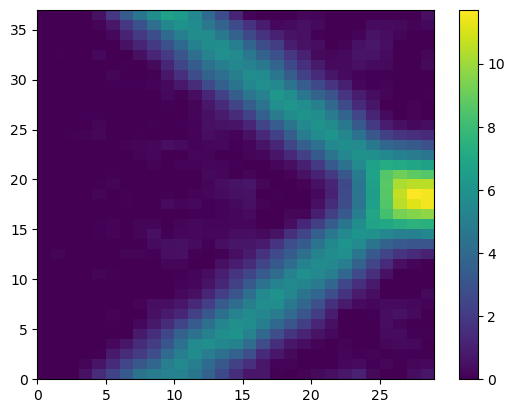

In [16]:
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

In [17]:
AtB0, AtA = A.T @ B0, A.T @ A
pre_creation_abssums = {"AtB0":abs(AtB0).sum(), "AtA":abs(AtA).sum()}

Setting up the OSQP problem
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


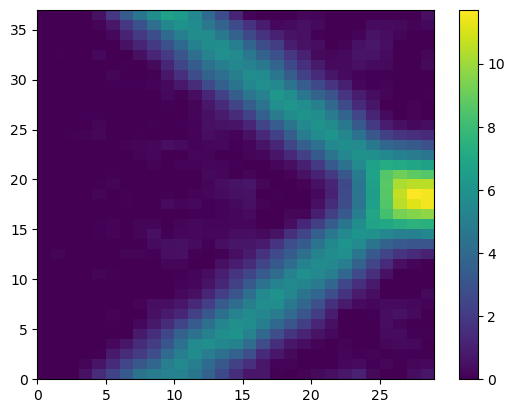

In [18]:
spk0ctr = SpookPosL1(AtB0, AtA, "contracted", lsparse=5, lsmooth=(0.1,0.1))
X0ctr = spk0ctr.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X0ctr)
plt.colorbar()

In [19]:
print(f"Before creating the spook solver")
for ky, val in pre_creation_abssums.items():
    print(f"\tsum(|{ky}|)={val:.2g}", end='   ')
print("\nAfter running the spook solver", end='  ')
assert np.allclose(pre_creation_abssums["AtB0"], abs(AtB0).sum())
assert np.allclose(pre_creation_abssums["AtA"], abs(AtA).sum())
print("AtB0 & AtA remain unchanged.")

Before creating the spook solver
	sum(|AtB0|)=4e+09   	sum(|AtA|)=8.6e+07   
After running the spook solver  AtB0 & AtA remain unchanged.


Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


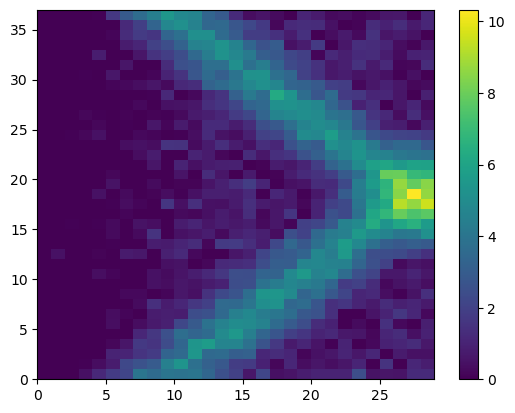

In [20]:
spk0 = SpookPosL2(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


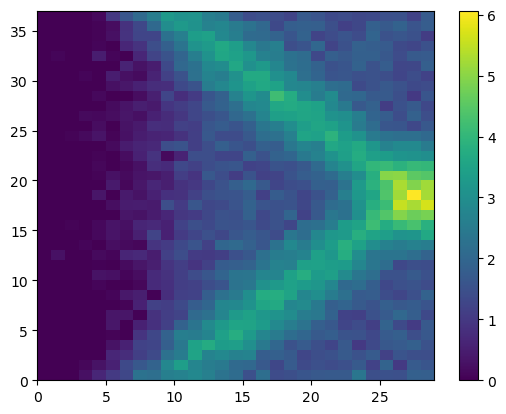

In [21]:
X0 = spk0.getXopt(lsparse=0.5, lsmooth=(0,0))
plt.pcolormesh(X0)
plt.colorbar()

Structure of P matrix remained the same
Resetting problem to be flattened
Setting up the OSQP problem
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


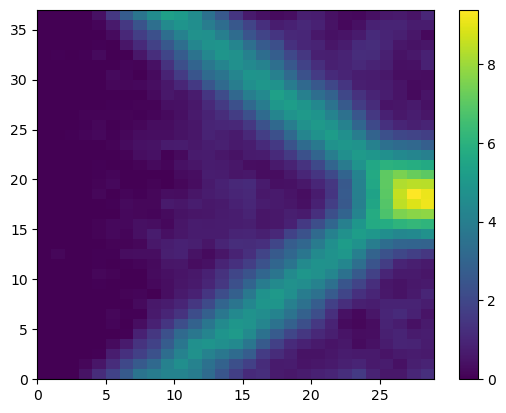

In [22]:
X0 = spk0.getXopt(lsparse=0.1, lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
Setting up the OSQP problem
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


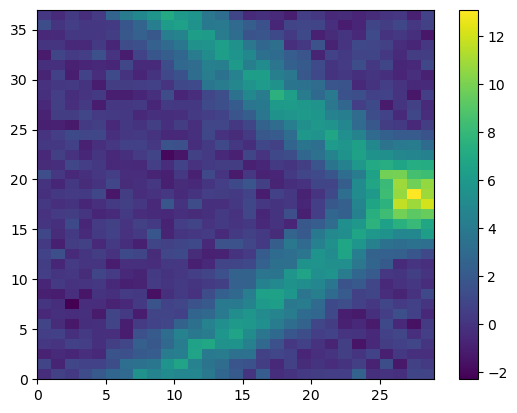

In [23]:
spk0 = SpookL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))

X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Resetting problem to be flattened
Setting up the OSQP problem
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


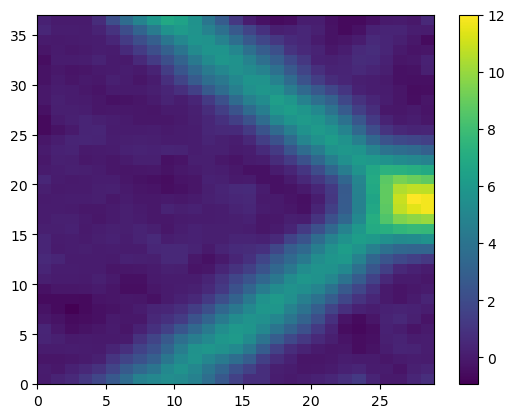

In [24]:
X0 = spk0.getXopt(lsparse=5,lsmooth=(0.1,0.1))
plt.pcolormesh(X0)
plt.colorbar()

## With non trivial G

In [25]:
spk1 = SpookPosL2(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Structure of P matrix remained the same
Structure of P matrix remained the same
Updated
Nonnegative constraints and L2 sparsity reg.
Solving Quad. Prog.


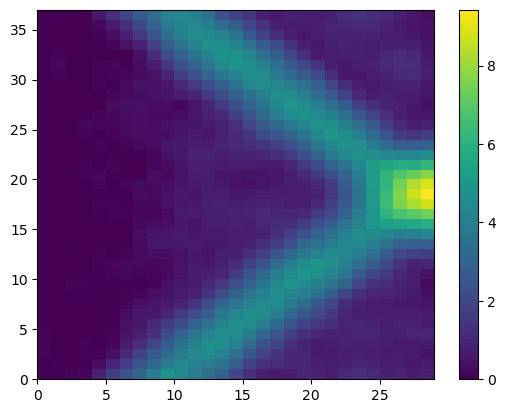

In [26]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [27]:
spk1 = SpookPosL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


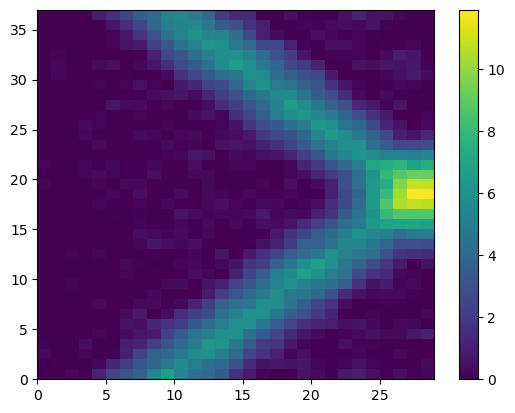

In [28]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

In [29]:
prctr = spk1.save_prectr()

spk1ctr = SpookPosL1(prctr['Bcontracted'], prctr['AtA'], "contracted", prctr['GtG'], lsparse=0.1, lsmooth=(0.01,0.01))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


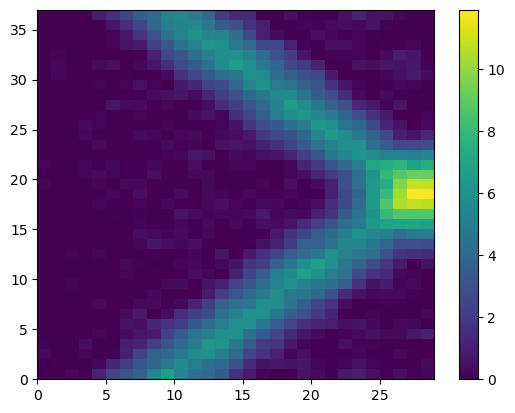

In [30]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [31]:
prctr = spk1.save_prectr(True)

In [32]:
spk1ctr = SpookPosL1(prctr['Bcontracted_nmlz'], prctr['AtA_nmlz'], "contracted", prctr['GtG_nmlz'], lsparse=0.1, lsmooth=(0.01,0.01), 
                     normalize=(prctr['sA'],prctr['sG']))

Setting up the OSQP problem


Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


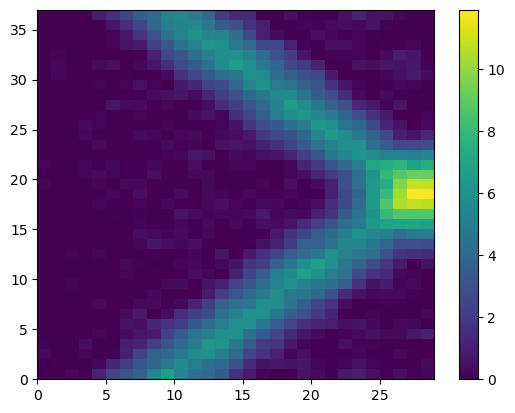

In [33]:
X1 = spk1ctr.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

In [34]:
spk1 = SpookL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.0,0.0))

Setting up the OSQP problem


L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


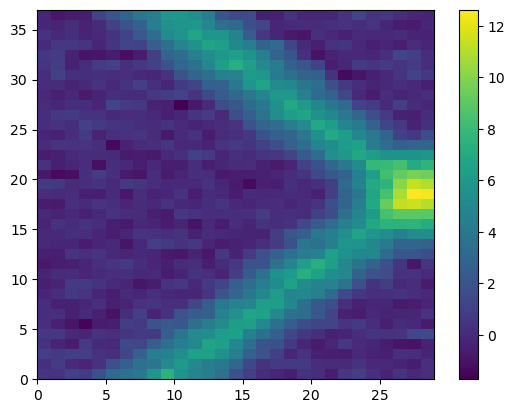

In [35]:
X1 = spk1.getXopt()
plt.pcolormesh(X1)
plt.colorbar()

Sparsity hyperparam updated.
Structure of P matrix remained the same
Updated
L1 sparsity reg. w/o nonnegative constraint
Solving Quad. Prog.


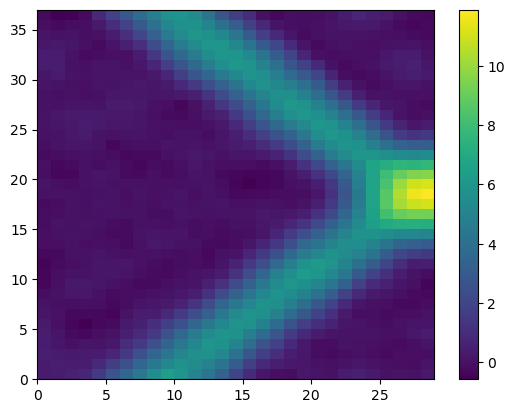

In [36]:
X1 = spk1.getXopt(lsparse=5, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [37]:
spk1 = SpookLinSolve(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

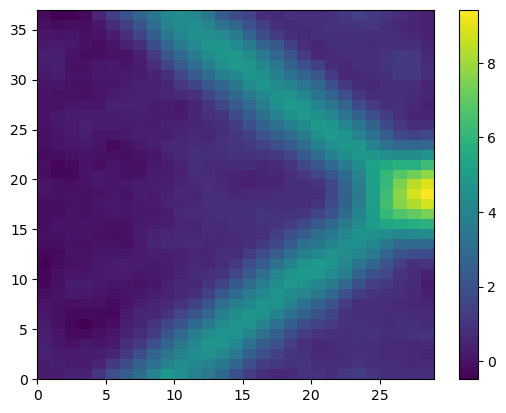

In [38]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [39]:
prctr = spk1.save_prectr(True)
spk1ctr = SpookLinSolve(prctr['Bcontracted_nmlz'], prctr['AtA_nmlz'], "contracted", prctr['GtG_nmlz'], 
                        lsparse=0.05, lsmooth=(0.1,0.1), normalize=(prctr['sA'],prctr['sG']))

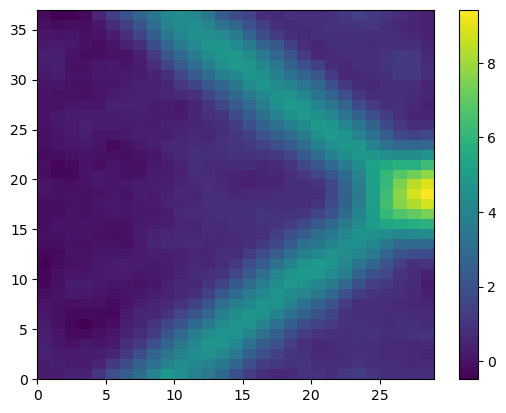

In [40]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

In [41]:
spk1 = SpookL2(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.01,0.01))

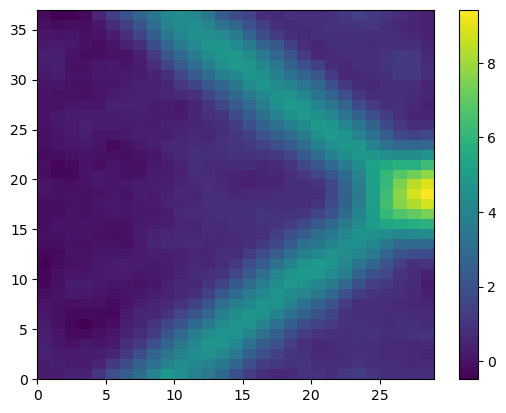

In [42]:
X1 = spk1.getXopt(lsparse=0.05, lsmooth=(0.1,0.1))
plt.pcolormesh(X1)
plt.colorbar()

In [43]:
prctr = spk1.save_prectr(True)
spk1ctr = SpookL2(prctr['Bcontracted_nmlz'], prctr['AtA_nmlz'], "contracted", prctr['GtG_nmlz'], 
                        lsparse=0.05, lsmooth=(0.1,0.1), normalize=(prctr['sA'],prctr['sG']))

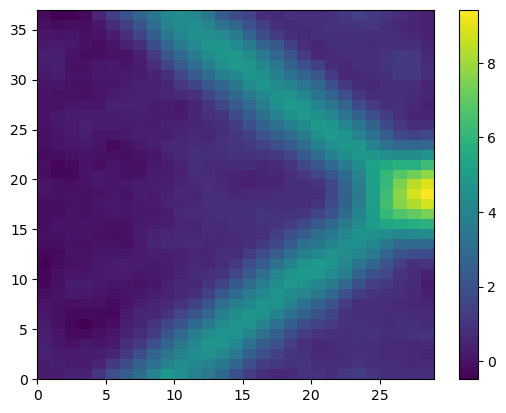

In [44]:
X1ctr = spk1ctr.getXopt()
plt.pcolormesh(X1ctr)
plt.colorbar()

# 1D test

Text(0.5, 0, '$\\omega$')

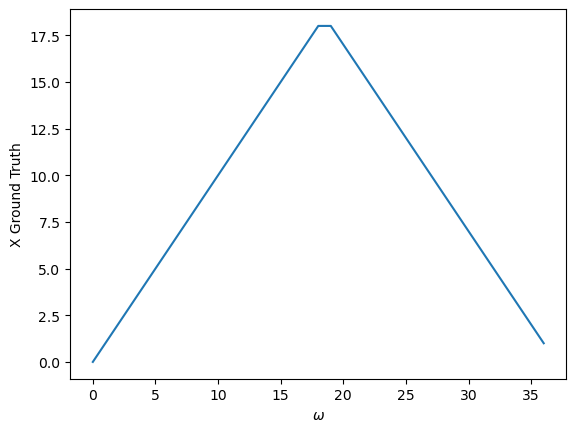

In [4]:
Na = 37
Ns = 10000

A = np.random.rand(Ns, Na) * 5
Xtrue = Na/2 - abs(np.arange(Na) - Na/2)

plt.plot(Xtrue)
plt.ylabel("X Ground Truth")
plt.xlabel("$\omega$")

In [5]:
B0 = A @ Xtrue
B0 += 1e-3*np.linalg.norm(B0) * np.random.randn(*(B0.shape))

In [16]:
spk0 = SpookL2(B0, A, "raw", None, lsparse=0.1, lsmooth=0.01)

In [17]:
X1 = spk0.getXopt(lsparse=0.05, lsmooth=0.1)

In [18]:
X1.shape

(37, 1)

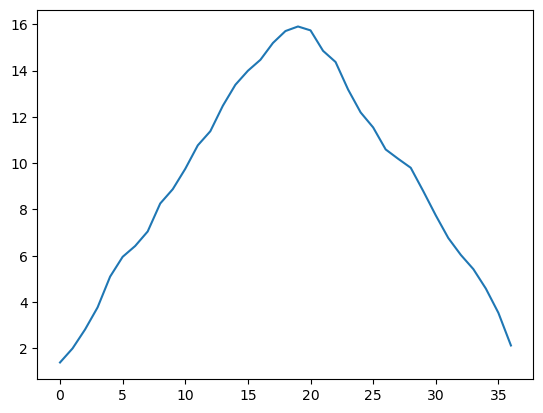

In [19]:
plt.plot(X1.ravel())

In [20]:
spk0 = SpookL1(B0, A, "raw", None, lsparse=0.1, lsmooth=0.01)

In [21]:
X1 = spk0.getXopt(lsparse=0.05, lsmooth=0.1)

In [22]:
X1.shape

(37, 1)